In [1]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
g22=pd.read_csv('GyC22.csv')
g22=g22.drop(['Unnamed: 0'],axis=1)

In [8]:
cuantitativas = g22.iloc[:,8:16]
cuantitativas.info()

cualitativas = g22.iloc[:,[0,1,2,3,4,5,6,7,17]]
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TC         1941 non-null   float64
 1   Importe    2577 non-null   float64
 2   IVA        2577 non-null   float64
 3   RET ISR    2577 non-null   float64
 4   RET IVA    2577 non-null   float64
 5   Otros      2577 non-null   int64  
 6   TOTAL MX   2577 non-null   float64
 7   TOTAL SAT  2577 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 161.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        2577 non-null   object
 1   Folio        2475 non-null   object
 2   UUID         2577 non-null   object
 3   RFC          2577 non-null   object
 4   Proveedor    2577 non-null   object
 5   TIPO GASTO   2577 non-null   object
 6   Des

<Figure size 1500x800 with 0 Axes>

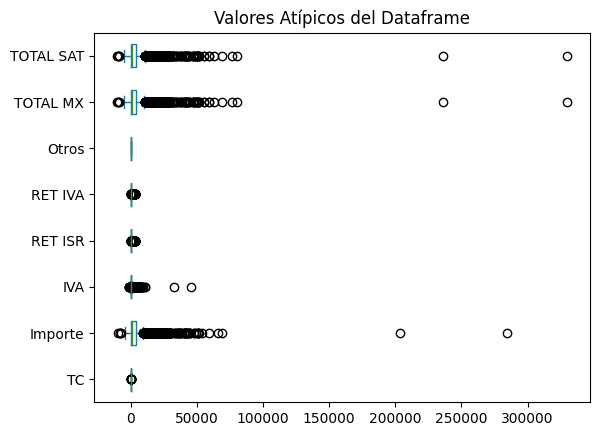

In [9]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [10]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.710471
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
Otros            0.000000
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64
Limite inferior permitido TC              -4.353819
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
Otros            0.000000
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [11]:
datag22= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
datag22

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,0,17826.62,17826.62
2574,NaN,0.00,0.00,0.0,0.0,0,0.00,0.00
2575,NaN,0.00,0.00,0.0,0.0,0,0.00,0.00


In [12]:
valores_nulos=datag22.isnull().sum()
valores_nulos

TC           654
Importe       36
IVA           31
RET ISR       32
RET IVA       32
Otros          0
TOTAL MX      36
TOTAL SAT     36
dtype: int64

In [13]:
data_clean=datag22.copy()
data_clean=data_clean.fillna(round(datag22.mean(),1))
data_clean

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00


In [14]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [15]:
Datos_limpios = pd.concat([data_clean, cualitativas], axis=1)
Datos_limpios

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Status
0,1.0,5551.38,888.22,0.0,0.0,0,6439.60,6439.60,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,Vigente
1,1.0,5551.98,888.32,0.0,0.0,0,6440.30,6440.30,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,Vigente
2,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,Vigente
3,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,Vigente
4,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,Vigente
2573,1.0,17310.30,516.32,0.0,0.0,0,17826.62,17826.62,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,Vigente
2574,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,Vigente
2575,1.0,0.00,0.00,0.0,0.0,0,0.00,0.00,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,Vigente


In [17]:
Datos_limpios.to_csv('G22imputado.csv')